In [2]:
import csv

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
from pandas import *
import seaborn as sns
from matplotlib import rcParams
import datetime as dt

In [5]:
import os
import glob

In [6]:
df = pd.read_csv('C:/Users/a.guidi/Desktop/side_project/yellowtaxi/2016_Yellow_Taxi_Trip_Data.csv')

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID
0,1,06/06/2016 12:00:00 AM,06/06/2016 12:16:57 AM,1,6.60,-73.946548,40.785099,1,N,-73.923866,...,3,20.0,0.5,0.5,0.00,0.00,0.3,21.30,NaN,NaN
1,2,06/06/2016 12:00:00 AM,06/06/2016 12:00:00 AM,1,4.27,-73.952385,40.741501,2,N,-74.004097,...,1,52.0,0.0,0.5,0.00,5.54,0.3,58.34,NaN,NaN
2,2,06/06/2016 12:00:00 AM,06/06/2016 06:07:49 PM,1,2.02,-73.978745,40.750641,1,N,-73.997108,...,1,10.0,1.3,0.5,1.25,0.00,0.3,13.35,NaN,NaN
3,2,06/06/2016 12:00:01 AM,06/06/2016 12:04:05 AM,2,1.37,-73.980690,40.742210,1,N,-73.967842,...,1,6.0,0.5,0.5,1.82,0.00,0.3,9.12,NaN,NaN
4,1,06/06/2016 12:00:02 AM,06/06/2016 12:03:36 AM,1,0.90,-73.986794,40.756310,1,N,-73.976067,...,2,5.0,0.5,0.5,0.00,0.00,0.3,6.30,NaN,NaN


In [8]:
df.shape

(2626843, 21)

In [9]:
print(df.columns.tolist())

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'PULocationID', 'DOLocationID']


In [11]:
df = df.drop(df.index[(df['pickup_longitude'] == df['dropoff_longitude']) & (df['pickup_latitude'] == df['dropoff_latitude'])])

In [12]:
df['tpep_pickup_datetime'] = to_datetime(df['tpep_pickup_datetime'])

In [13]:
df['tpep_dropoff_datetime'] = to_datetime(df['tpep_dropoff_datetime'])

In [14]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID
0,1,2016-06-06 00:00:00,2016-06-06 00:16:57,1,6.60,-73.946548,40.785099,1,N,-73.923866,...,3,20.0,0.5,0.5,0.00,0.00,0.3,21.30,NaN,NaN
1,2,2016-06-06 00:00:00,2016-06-06 00:00:00,1,4.27,-73.952385,40.741501,2,N,-74.004097,...,1,52.0,0.0,0.5,0.00,5.54,0.3,58.34,NaN,NaN
2,2,2016-06-06 00:00:00,2016-06-06 18:07:49,1,2.02,-73.978745,40.750641,1,N,-73.997108,...,1,10.0,1.3,0.5,1.25,0.00,0.3,13.35,NaN,NaN
3,2,2016-06-06 00:00:01,2016-06-06 00:04:05,2,1.37,-73.980690,40.742210,1,N,-73.967842,...,1,6.0,0.5,0.5,1.82,0.00,0.3,9.12,NaN,NaN
4,1,2016-06-06 00:00:02,2016-06-06 00:03:36,1,0.90,-73.986794,40.756310,1,N,-73.976067,...,2,5.0,0.5,0.5,0.00,0.00,0.3,6.30,NaN,NaN


In [15]:
df = df.drop(df.index[(df.tpep_dropoff_datetime-df.tpep_pickup_datetime).astype('timedelta64[s]') < 95])

In [16]:
--2559609

2559609

In [17]:
df = df.drop(df.index[df.passenger_count == 0])
#ok

In [18]:
df.shape

(2556812, 21)

In [19]:
df[df['passenger_count'] > 1].count()

VendorID                 747125
tpep_pickup_datetime     747125
tpep_dropoff_datetime    747125
passenger_count          747125
trip_distance            747125
pickup_longitude         747125
pickup_latitude          747125
RatecodeID               747125
store_and_fwd_flag       747125
dropoff_longitude        747125
dropoff_latitude         747125
payment_type             747125
fare_amount              747125
extra                    747125
mta_tax                  747125
tip_amount               747125
tolls_amount             747125
improvement_surcharge    747125
total_amount             747125
PULocationID                  0
DOLocationID                  0
dtype: int64

In [20]:
df.groupby('passenger_count').size()

passenger_count
1    1809687
2     372610
3     107552
4      50783
5     134102
6      82075
7          2
8          1
dtype: int64

In [21]:
df2 = df

In [22]:
df2 = df2.loc[df2.index.repeat(df.passenger_count)]

In [23]:
df2.shape

(4243677, 21)

In [24]:
df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID
0,1,2016-06-06 00:00:00,2016-06-06 00:16:57,1,6.60,-73.946548,40.785099,1,N,-73.923866,...,3,20.0,0.5,0.5,0.00,0.0,0.3,21.30,NaN,NaN
2,2,2016-06-06 00:00:00,2016-06-06 18:07:49,1,2.02,-73.978745,40.750641,1,N,-73.997108,...,1,10.0,1.3,0.5,1.25,0.0,0.3,13.35,NaN,NaN
3,2,2016-06-06 00:00:01,2016-06-06 00:04:05,2,1.37,-73.980690,40.742210,1,N,-73.967842,...,1,6.0,0.5,0.5,1.82,0.0,0.3,9.12,NaN,NaN
3,2,2016-06-06 00:00:01,2016-06-06 00:04:05,2,1.37,-73.980690,40.742210,1,N,-73.967842,...,1,6.0,0.5,0.5,1.82,0.0,0.3,9.12,NaN,NaN
4,1,2016-06-06 00:00:02,2016-06-06 00:03:36,1,0.90,-73.986794,40.756310,1,N,-73.976067,...,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,NaN,NaN


In [25]:
df2 = df2.drop(df2.index[df2.passenger_count > 3])

In [28]:
df2.shape

(2877563, 21)

In [90]:
df_timestamp = min(df2['tpep_pickup_datetime']) + timedelta(minutes = 5)

In [87]:
max_timestamp = max(df2['tpep_pickup_datetime'])

In [88]:
time_increments = []

In [92]:
while df_timestamp <= max_timestamp:
    df_timestamp += timedelta(minutes = 5)
    time_increments.append(df_timestamp)

In [34]:
testanna = df2[df2['tpep_pickup_datetime'] < starting_timestamp]

In [36]:
testanna.shape

(765, 21)

In [37]:
from sklearn.cluster import KMeans

In [42]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.3.


In [44]:
from sklearn.cluster import AgglomerativeClustering

In [152]:
test = testanna[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].values

In [153]:
test[0]

array([ 40.78509903, -73.94654846,  40.80770493, -73.92386627])

In [154]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [155]:
Z = linkage(test, method='ward',  # dissimilarity metric: max distance across all pairs of records between two clusters,
            metric='euclidean')  

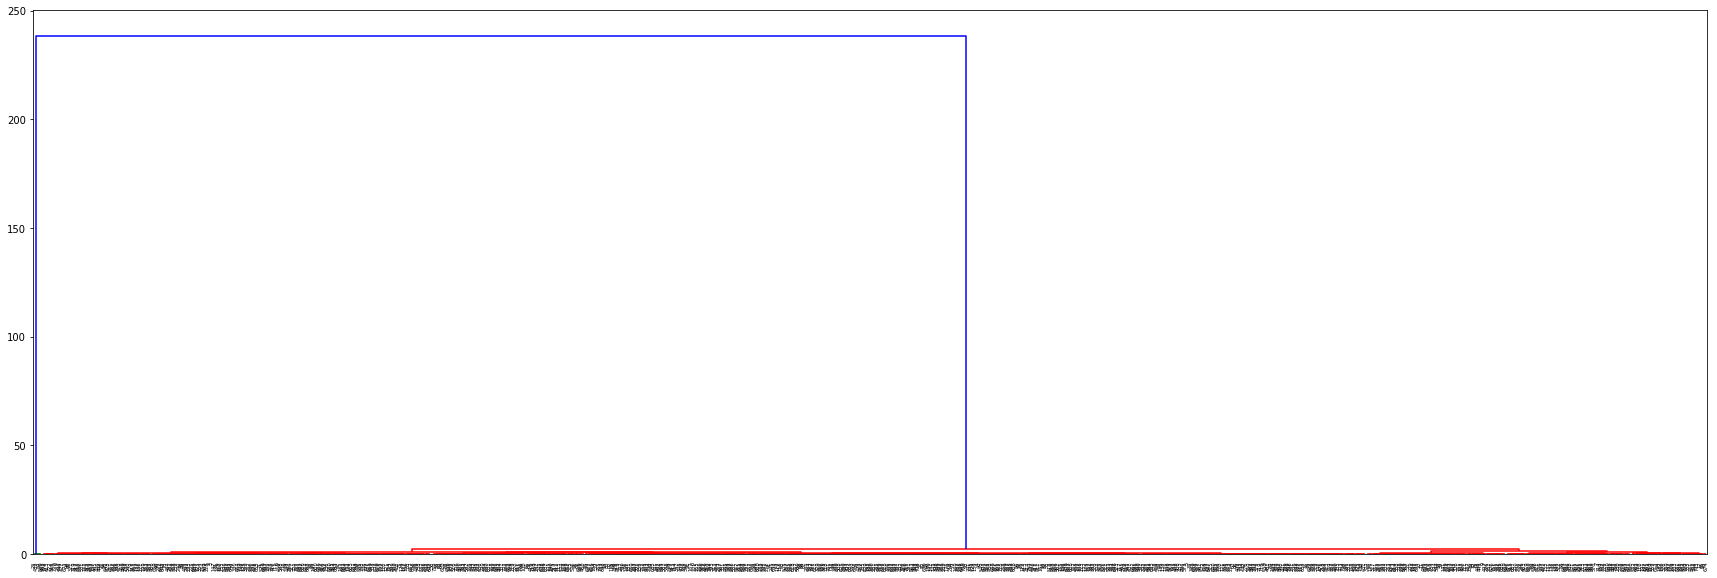

In [156]:
plt.figure(figsize=(30, 10))
dendrogram(Z)
plt.show()

In [157]:
Z

array([[9.40000000e+01, 9.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.30000000e+02, 2.31000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.32000000e+02, 7.66000000e+02, 0.00000000e+00, 3.00000000e+00],
       ...,
       [1.51800000e+03, 1.52400000e+03, 1.32238997e+00, 1.56000000e+02],
       [1.52500000e+03, 1.52600000e+03, 2.41813077e+00, 7.61000000e+02],
       [1.48200000e+03, 1.52700000e+03, 2.38183796e+02, 7.65000000e+02]])

In [136]:
from scipy.cluster.hierarchy import fcluster

In [137]:
max_d = .015

In [138]:
clusters = fcluster(Z, max_d, criterion='distance')

In [139]:
clusters

array([ 10, 201,  49,  49, 242, 231,  61, 306, 160, 276, 264, 264, 296,
       171, 177, 144, 211, 339, 210,  62, 168,  22, 289,   3, 323,  68,
        68, 266, 154, 143, 227, 139, 139, 231, 152, 249, 249, 192, 269,
       269, 193, 170, 240, 340, 253, 171, 201,  78,  44,  44, 108, 149,
       211, 211,  21,  97, 208, 208, 297,   1, 239, 125, 125,  97,  97,
       339, 174, 174, 174, 196, 183,  59, 274, 274, 274,  89,  92,  52,
        42, 197, 144,  50, 192,  91, 291, 167, 252, 254,  99, 243,  38,
       158, 145, 199,  11,  11, 239,  81, 145, 122, 122, 122, 270, 271,
       143, 131,  91, 217, 217,  50,  50, 248, 209, 136, 126, 145, 318,
       171, 171, 322,  87,  87,  87,  48,  80,  55,  89,  89, 233, 200,
       200, 295, 295, 295, 227, 227, 227,  32,  32,  29, 253, 269, 194,
       194, 253, 334, 100,  50, 250,  56, 327, 205, 296,  17,  49, 215,
       215,  19, 252, 307, 197, 212, 148, 332, 243, 160, 160, 159, 114,
       127, 237, 237, 217, 217,   5, 196, 328, 255, 134,  31, 19

In [140]:
unique, counts = np.unique(clusters, return_counts=True)

In [141]:
first_clusters = dict(zip(unique, counts))

In [142]:
len(dict(zip(unique, counts)))

341

In [143]:
len(fibrst_clusters)

341

In [158]:
first_clusters

{1: 2,
 2: 1,
 3: 1,
 4: 2,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 2,
 10: 1,
 11: 2,
 12: 1,
 13: 1,
 14: 4,
 15: 2,
 16: 2,
 17: 1,
 18: 2,
 19: 1,
 20: 1,
 21: 2,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 2,
 27: 3,
 28: 1,
 29: 1,
 30: 1,
 31: 2,
 32: 3,
 33: 4,
 34: 1,
 35: 1,
 36: 1,
 37: 3,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 2,
 44: 2,
 45: 1,
 46: 3,
 47: 3,
 48: 2,
 49: 5,
 50: 4,
 51: 4,
 52: 2,
 53: 1,
 54: 2,
 55: 2,
 56: 1,
 57: 3,
 58: 2,
 59: 3,
 60: 3,
 61: 4,
 62: 3,
 63: 1,
 64: 2,
 65: 2,
 66: 2,
 67: 3,
 68: 2,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 2,
 75: 1,
 76: 3,
 77: 2,
 78: 1,
 79: 2,
 80: 3,
 81: 2,
 82: 1,
 83: 3,
 84: 2,
 85: 2,
 86: 1,
 87: 4,
 88: 4,
 89: 3,
 90: 1,
 91: 4,
 92: 2,
 93: 3,
 94: 1,
 95: 1,
 96: 1,
 97: 3,
 98: 1,
 99: 2,
 100: 2,
 101: 1,
 102: 1,
 103: 1,
 104: 2,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 3,
 110: 1,
 111: 4,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 3,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 2,
 122: 3,
 123: 1,
 

In [159]:
sum(1 for x in first_clusters.values() if x > 3)

54

In [160]:
print(54.0/341)

0.15835777126099707
